# **# Hate Speech Detection on Twitter Platform**

# **1. Problem Statement :**

 In today's digital age, hate speech on online platforms is a growing concern that impacts individuals and communities globally. Social media platform like Twitter host billions of users who generate a vast amount of content daily. The business problem we are addressing is the need for an efficient, scalable, and accurate system to automatically detect and mitigate hate speech in user-generated content on Twitter platform.

# **2. Solution Description :**

To address the problem of hate speech on Twitter platform, we propose developing a machine learning model that can automatically detect and categorize user-generated content into hate speech/offensive language and neutral content. The solution involves the following steps:

**1.Data Collection:**


*   **Dataset:** After gone through various datasets, we selected Davidson dataset that best met our criteria for comprehensiveness, diversity, and quality.Which is categorizes into 3 categories as hate speech, offensice language and neither.

**2.Data Preprocessing :**


*   **Data Cleaning :** Handling missing values, removing duplicates, convert abbreviations into text, handling nan values, decoding HTML entities, normalizing texts, converting text to lowercase, removing stopwords.
*   **Tokenization :** Using word tokenizer for dividing the text into individual word.

*  **Lemmatization :**  Use Lemmatization for grouping together the different inflected forms of a word so they can be analyzed as a single item
*   **Stemming :** Use Stemming for transforming words to their root form.

**3.Data Labeling :**

Labeling data as hate speech/offensive language and non hate speech. Hate speech and offensive language is encoded as 0 and non hate speech is encoded as 1.

**4.Data Embedding :**

Using TF - IDF Embedding method for calculation of how relevant a word in a series or corpus is to a text.

**5.Model Development and Training:**

*   **Development :**
 Using Convolutional Neural Network (CNN) with sequential (). Model include dense layers with ReLU activation, output layer with softmax activation, MaxPooling.

*   **Training :**

  *   Compling model using categorial_crossentropy loss function and Adam optimizer with learing rate 0.001.
  *   Using EarlyStoping() with patience as 5  and min_delta as 0.001.

**6. Evaluation:**

Evaluating the model on the validation set and optimizing validation accuracy. Generating classification report and confusion matrix to observe the performace of model.

**7. Deployment:**

Integrate the model into Twitter platform to assist in real-time content moderation.



# **3. Dataset Description :**

Selected Davidson dataset has over 24,000 entries, covering a wide range of hate speech scenarios and user-generated content from Tweeter platform. Each tweet is labeled as hate speech, offensive language, or neutral content.


*   Dataset Structure:

  * count: Number of occurrences/interactions of the tweet
  * hate_speech: Indicates the presence of hate speech in the tweet.
  * offensive_language: Indicates the presence of offensive language in the tweet.
  * neither: Indicates the tweet does not contain hate speech or offensive language.
  * class: Categorization of the tweet in original dataset (2 = neither, 1 = offensive language, 0 = hate speech).

*  Dataset Size:
   * Hate speech -20609

   * Non Hate speech- 4159



# **4. Data Visualization :**

**a. Train, Test and Validation Test data size :**

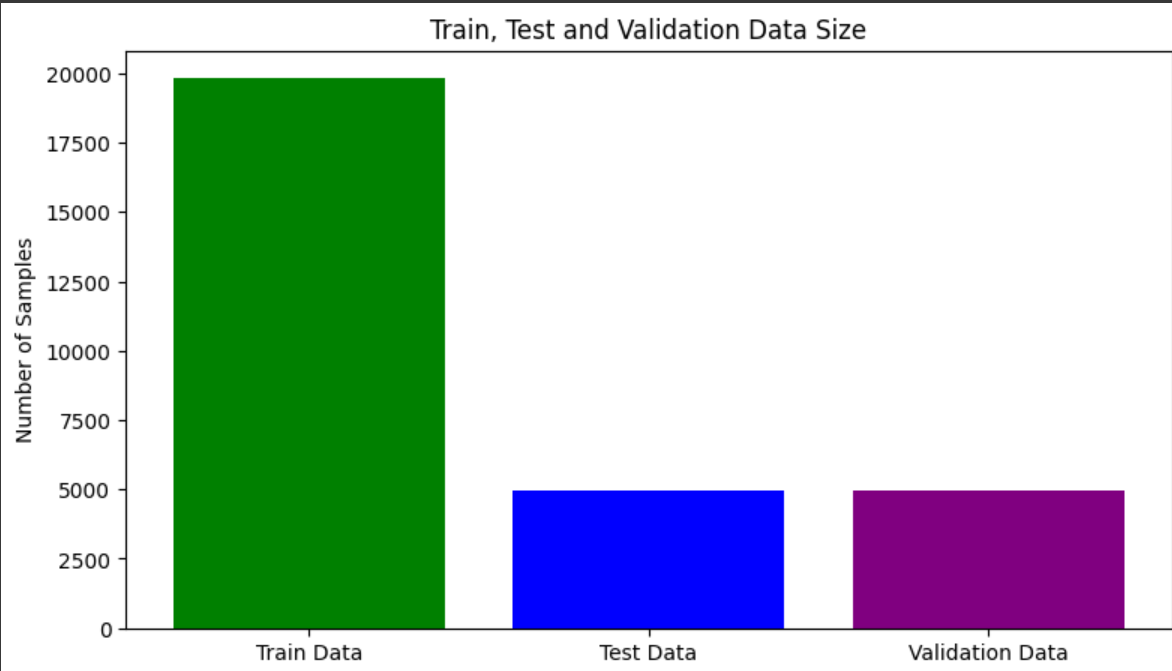

**b. Label wise split in Train Data :**

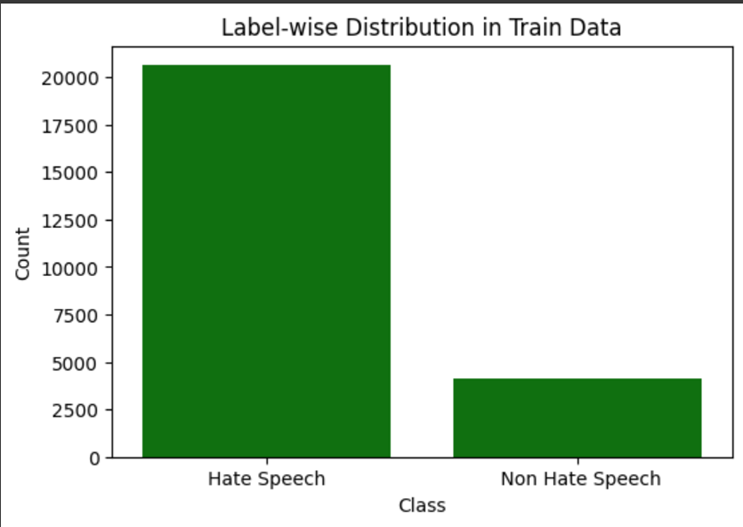

# **5. Confusion Matrix and Classification Report of Best Model**

**Confusion Matrix :**

****
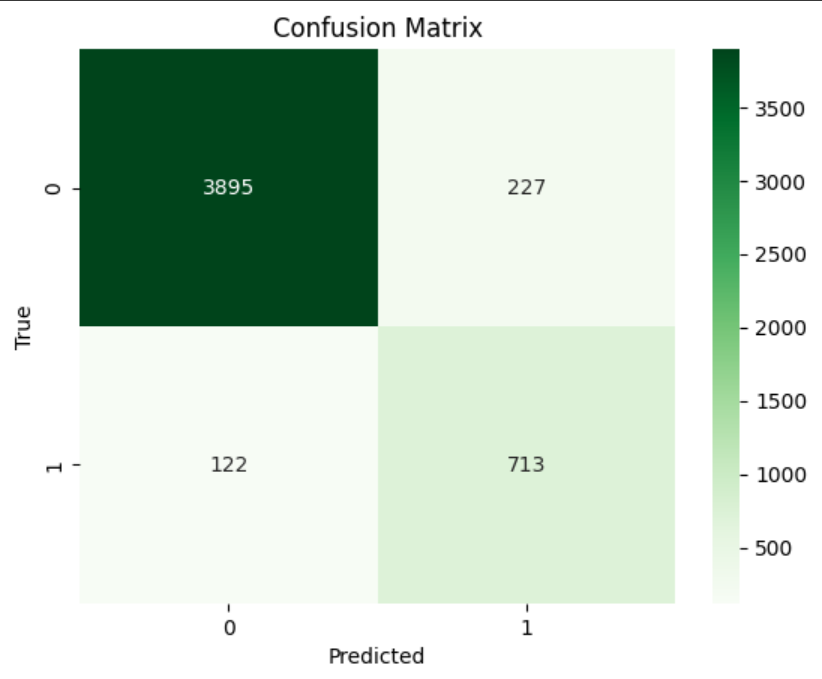

**Classification Report :**

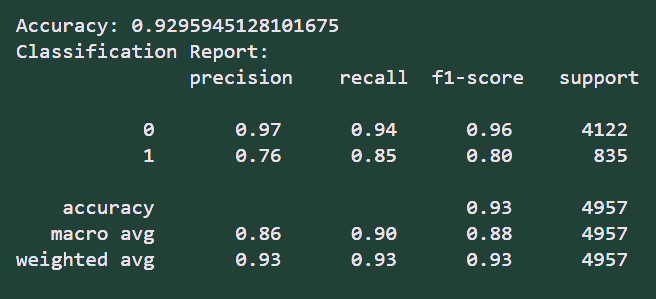

# **6. Prediction on samples :**

In [39]:
!pip install contractions
import re
import pandas as pd
import pickle

import nltk
import contractions
import string

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer


nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')


def preprocess_text(text):
    text = text.lower()
    try:
        if detect(text) != 'en':
            return ""
    except:
        return ""

    text = re.sub(r'http\S+|www\S+|https\S+', '', text)
    text = re.sub(r'\@\w+|\#', '', text)
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    expanded_words = [contractions.fix(word) for word in text.split()]
    text = ' '.join(expanded_words)
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = ''.join([i for i in text if not i.isdigit()])
    tokens = word_tokenize(text)
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    clean_text = ' '.join(tokens)

    return clean_text

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [50]:
import tensorflow as tf


model = tf.keras.models.load_model("cnn_model.h5")

In [74]:
# preprocessed text
preprocessed_texts = [preprocess_text(t) for t in text]

with open('tfidf_model.pkl', 'rb') as f:
    tfidf_vectorizer = pickle.load(f)

# Fit the vectorizer to your preprocessed text data to ensure
# it has the same vocabulary as the training data.
# However, you should only transform, not fit, to keep the vocabulary consistent
def predict_hate_speech(text):
    preprocessed_text = preprocess_text(text)
    text_tfidf = tfidf_vectorizer.transform([preprocessed_text]).toarray()
    prediction_prob = model.predict(text_tfidf)
    if prediction_prob[0][0] > 0.5:
        return "Not Hate Speech"
    else:
        return "Hate Speech"


In [81]:
text = input("Enter the Comment:")
print(f"Text: {text}")
print(f"Prediction: {predict_hate_speech(text)}")


Enter the Comment:Be a girl with a mind, a bitch with an attitude and a lady with
Text: Be a girl with a mind, a bitch with an attitude and a lady with
1/1 [==============================] - 0s 45ms/step
Prediction: Hate Speech
